# DAAN 822 Data Collection & Cleaning (2025)
## Group 5: Afolabi Isiaka, Matthew Kucas
## The New York City Police Department Stop-and-Frisk Program: Recent Trends

### Note: This code cleans datasets, working through issues identified in Lesson 9

Import libraries

In [1]:
import pandas as pd 
import numpy as np 
#import matplotlib for plotting
import matplotlib.pyplot as plt

# SECTION 1: Stop and Frisk data

Import data into pandas dataframe

In [2]:
#Load Stop and Frisk data file
saf_data = pd.read_csv('C:\\Users\\mekna\\OneDrive\\Documents\\PSU\\DAAN_822\\Project\\Data_Warehouse\\NYPD_Stop_and_Frisk.csv', low_memory=False)

Create dataframe restricted to data that will be necessary for analysis (based on previous analyses of data)

In [3]:
# Identify column types
numerical_cols = ['year', 'pct', 'datestop', 'timestop', 'perobs', 'ht_feet', 'ht_inch', 'city', 'weight', 'xcoord', 'ycoord', 'age', 'detailcm', 'detailCM']
binary_cols = ['arstmade', 'sumissue', 'frisked', 'searched', 'pistol', 'riflshot', 'asltweap', 'knifcuti', 'machgun', 'othrweap']
categorical_cols = ['crimsusp', 'sex', 'race', 'inout', 'trhsloc']  # Start with key categoricals

In [4]:
# Create analysis dataset for numerical and binary columns
saf_analysis_data = saf_data[numerical_cols + binary_cols + categorical_cols].copy()

In [5]:
#Verify that there are 4 UNK values in crimsusp olumn
unk_crim = saf_analysis_data['crimsusp'] == 'UNK'
unk_crim_true = unk_crim.sum()
print(unk_crim_true)

13


### Issue 1: There are (39) missing values in the age field of the Stop-and-Frisk dataset

•	Error type: Coverage (missing values)

•	Remediation: Replace values with a designated placeholder value (integer field – replace with NULL)

In [6]:
#Replace missing age values with NULL
saf_analysis_data['age'] = saf_analysis_data['age'].replace(' ', 'NULL')

#Verify that there are no missing values left in age column
missing_age = saf_analysis_data['age'] == ' '
missing_age_true = missing_age.sum()
print(missing_age_true)

0


### Issue 2: There are (54) incorrect values of ** in the age field of the Stop-and-Frisk dataset

•	Error type: Semantic (integrity constraint violation – values in the age column must be numerical integers)
    
•	Remediation: Replace values with a designated placeholder value (integer field – replace with NULL)

In [7]:
#Replace missing age values with NULL
saf_analysis_data['age'] = saf_analysis_data['age'].replace('**', 'NULL')

#Verify that there are no missing values left in age column
star_age = saf_analysis_data['age'] == '**'
star_age_true = star_age.sum()
print(star_age_true)

0


### Issue 3: There are (2824) unrealistic values in the age field of the Stop-and-Frisk dataset
    
•	Error type: Semantic (integrity constraint violation – values in the age column must be <= 100 and > 6)
    
•	Remediation: Replace values with a designated placeholder value (integer field – replace with NaN)

In [8]:
#Convert age column from object to integer - note: this would also take care of issues 1 and 2 as a standalone step
saf_analysis_data['age'] = pd.to_numeric(saf_analysis_data['age'], errors='coerce').astype('Int64')

#Find age values that exceed 100
too_old = saf_analysis_data['age'] > 100
too_old_true = too_old.sum()
#Display number of too old age values
too_old_true

1407

In [9]:
#Replace ages exceeding 100 with NaN
saf_analysis_data['age'][saf_analysis_data['age'] > 100] = np.nan

In [10]:
#Find age values that exceed 100
too_old = saf_analysis_data['age'] > 100
too_old_true = too_old.sum()
#Display number of too old age values
too_old_true

0

In [11]:
#Find age values 6 and under 
(saf_analysis_data['age'] <= 6).sum()

1417

In [12]:
#Replace ages 6 and under with NaN
saf_analysis_data['age'][saf_analysis_data['age'] <= 6] = np.nan

In [13]:
too_young = saf_analysis_data['age'] <= 6
too_young_true = too_old.sum()
#Display number of too old age values
too_young_true

0

In [14]:
#Check age column for unique values - verify all values are integers =< 100 OR NaN
print(*saf_analysis_data['age'].unique())

20 18 19 37 21 62 31 34 26 23 54 27 17 58 24 38 68 29 16 35 15 28 13 45 22 30 43 46 36 42 41 39 14 55 25 51 48 47 52 53 32 40 60 57 50 61 63 56 99 33 49 59 12 44 <NA> 74 71 67 66 65 64 77 10 73 80 78 70 72 11 82 75 76 96 69 81 86 84 83 9 8 79 91 100 7 89 95 85 97 88 87 98 93 94 90


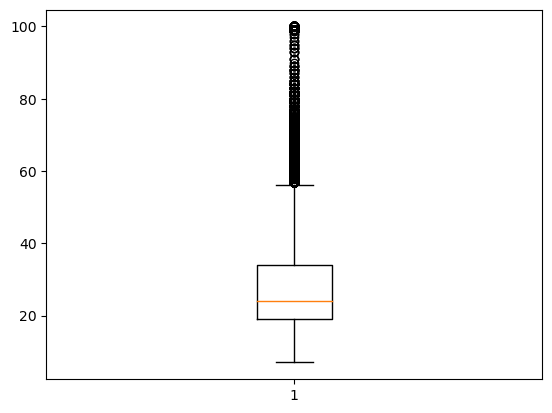

In [15]:
#Take another look at the distribution of age values
age_no_nan = saf_analysis_data['age'].dropna()
plt.boxplot(age_no_nan);

In [16]:
#Check percentage proportion over age 55 - ~3 percent - reasonable number, so consider valid
older_proportion = (saf_analysis_data['age'] > 55).sum() / (saf_analysis_data['age'] > 0).sum()
older_proportion * 100

2.9798973671055875

In [17]:
(saf_analysis_data['age'] > 0).sum()

790195

### Issue 4: There are (4) missing (null) values in the crimsusp (suspected crime) field of the Stop-and-Frisk dataset
    
•	Error type: Coverage (missing values)
    
•	Remediation: Replace values with a designated placeholder value (string field – replace with “UNK”)

In [18]:
#Check initial number of UNK values in crimsusp column
unk_crim = saf_analysis_data['crimsusp'] == 'UNK'
unk_crim_true = unk_crim.sum()
print(unk_crim_true)

13


In [19]:
#Replace missing crimesusp values with UNK
saf_analysis_data['crimsusp'] = saf_analysis_data['crimsusp'].fillna('UNK')

#Verify that there are 4 more UNK values in crimsusp olumn
unk_crim = saf_analysis_data['crimsusp'] == 'UNK'
unk_crim_true = unk_crim.sum()
print(unk_crim_true)

17


In [20]:
#And verify that there are no more NULL values in crimsusp olumn
saf_analysis_data['crimsusp'].isnull().sum()

0

### Issue 5: There are missing values and values of “1” in the pistol (was a pistol found on the suspect), riflshot (was a rifle found on the suspect), asltweap (was an assault weapon found on the suspect), knifcuti (was a knife found on the suspect), machgun (was a machine gun found on the suspect), and othrweap (was another type of weapon found on the suspect) fields of the Stop-and-Frisk dataset (approx. 11000 records)
    
•	Error type: Coverage (missing values) and semantic (integrity constraint violation – values in these columns must be Y or N)
    
•	Remediation: Manual inspection of the dataset revealed that multiple records from the year 2014 were marked with blanks in place of N and with 1 in place of Y; replace blank with N and 1 with Y in each of these columns

In [21]:
#Replace missing pistol, riflshot, asltweap, knifcuti, machgun, and othrweap values with N
saf_analysis_data['pistol'] = saf_analysis_data['pistol'].replace(' ', 'N')
saf_analysis_data['riflshot'] = saf_analysis_data['riflshot'].replace(' ', 'N')
saf_analysis_data['asltweap'] = saf_analysis_data['asltweap'].replace(' ', 'N')
saf_analysis_data['knifcuti'] = saf_analysis_data['knifcuti'].replace(' ', 'N')
saf_analysis_data['machgun'] = saf_analysis_data['machgun'].replace(' ', 'N')
saf_analysis_data['othrweap'] = saf_analysis_data['othrweap'].replace(' ', 'N')

#Replace pistol, riflshot, asltweap, knifcuti, machgun, and othrweap values of 1 with Y
saf_analysis_data['pistol'] = saf_analysis_data['pistol'].replace('1', 'Y')
saf_analysis_data['riflshot'] = saf_analysis_data['riflshot'].replace('1', 'Y')
saf_analysis_data['asltweap'] = saf_analysis_data['asltweap'].replace('1', 'Y')
saf_analysis_data['knifcuti'] = saf_analysis_data['knifcuti'].replace('1', 'Y')
saf_analysis_data['machgun'] = saf_analysis_data['machgun'].replace('1', 'Y')
saf_analysis_data['othrweap'] = saf_analysis_data['othrweap'].replace('1', 'Y')

### Issue 6: There are (23340) missing values in the xcoord and ycoord fields of the Stop-and-Frisk dataset

•	Error type: Coverage (missing values)
    
•	Remediation: Replace values with a designated placeholder value (integer field – replace with NaN)

In [22]:
#Replace missing xcoord and ycoord values with NULL
saf_analysis_data['xcoord'] = saf_analysis_data['xcoord'].replace(' ', 'NULL')
saf_analysis_data['ycoord'] = saf_analysis_data['ycoord'].replace(' ', 'NULL')

In [23]:
#Convert xcoord and ycoord columns from object to integer
saf_analysis_data['xcoord'] = pd.to_numeric(saf_analysis_data['xcoord'], errors='coerce').astype('Int64')
saf_analysis_data['ycoord'] = pd.to_numeric(saf_analysis_data['ycoord'], errors='coerce').astype('Int64')

In [24]:
#Verify no more blank values in xcoord column
missing_xcoord = saf_analysis_data['xcoord'] == ' '
missing_xcoord_true = missing_xcoord.sum()
print(missing_xcoord_true)

0


In [25]:
#Verify no more blank values in ycoord column
missing_ycoord = saf_analysis_data['ycoord'] == ' '
missing_ycoord_true = missing_ycoord.sum()
print(missing_ycoord_true)

0


### Issue 7: There are (5) missing values in the city field of the Stop-and-Frisk dataset
    
•	Error type: Coverage (missing values)
    
•	Remediation: Replace values with a designated placeholder value (string field – replace with “UNK”)

In [26]:
#Check initial number of UNK values in city column
unk_city = saf_analysis_data['city'] == 'UNK'
unk_city_true = unk_city.sum()
print(unk_city_true)

0


In [27]:
#Replace missing city values with UNK
saf_analysis_data['city'] = saf_analysis_data['city'].replace(' ', 'UNK')

#Verify that there are 5 more UNK values in city olumn
unk_city = saf_analysis_data['city'] == 'UNK'
unk_city_true = unk_city.sum()
print(unk_city_true)

5


In [28]:
#Verify no more blank values in city column
missing_city = saf_analysis_data['city'] == ' '
missing_city_true = missing_city.sum()
print(missing_city_true)

0


### Issue 8: There are two different field designators for the crime detail code fields in the Stop-and-Frisk dataset – detailcm and detailCM 
    
•	Error type: Field labeling
    
•	Remediation: Combine values from the two fields into a single field

In [29]:
#Merge values from detailcm and detailCM columns into detailcm column and drop detailCM column
saf_analysis_data['detailcm'] = saf_analysis_data['detailcm'].fillna(saf_analysis_data['detailCM'])
saf_analysis_data.drop('detailCM', axis=1, inplace=True)

#Convert detailcm column from object to integer
saf_analysis_data['detailcm'] = pd.to_numeric(saf_analysis_data['detailcm'], errors='coerce').astype('Int64')

#Verify no more blank values in city column
missing_detailcm = saf_analysis_data['detailcm'] == ' '
missing_detailcm_true = missing_detailcm.sum()
print(missing_detailcm_true)

0


### Issue 9: There are incorrect values in the crimsusp field (e.g., “EAST 162 STREET” and “220.03”)  
    
•	Error type: Semantic (integrity constraint violation – values in the age column must be strings that represent / describe suspected crimes)
    
•	Remediation: The detailcm / detailCM fields contain numerical codes corresponding to suspected crimes.  Our analysis can rely on that data instead – drop the crimesup field

In [30]:
#Drop crimsusp column
saf_analysis_data.drop('crimsusp', axis=1, inplace=True)

### Issue 10: There are (580) values in the weight field that equal 999 and 8 that equal 0
    
•	Error type: Semantic (integrity constraint violation – unknown values should be set to common placeholder value)
    
•	Remediation: Replace values with a designated placeholder value (integer field – replace with NaN)

In [31]:
#Replace weight field 999 values with NULL
saf_analysis_data['weight'] = saf_analysis_data['weight'].replace(999, np.nan)

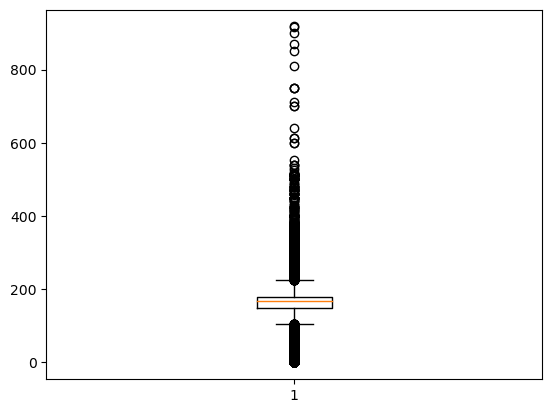

In [32]:
#Take a look at the distribution of weight values
weight_no_nan = saf_analysis_data['weight'].dropna()
plt.boxplot(weight_no_nan);

In [33]:
#Check percentage proportion weight under 100 - ~0.3 percent - reasonable number, so consider valid
under100_proportion = (saf_analysis_data['weight'] < 100).sum() / (saf_analysis_data['weight'] > 0).sum()
under100_proportion * 100

0.28503868652558156

In [34]:
#Check percentage proportion weight over 250 - ~1.2 percent - reasonable number, so consider valid
over250_proportion = (saf_analysis_data['weight'] > 250).sum() / (saf_analysis_data['weight'] > 0).sum()
over250_proportion * 100

1.1693021283898026

In [35]:
#Check if any weights are zero
no_weight = (saf_analysis_data['weight'] == 0).sum()
no_weight

8

In [36]:
#Replace weight field 0 values with NULL
saf_analysis_data['weight'] = saf_analysis_data['weight'].replace(0, np.nan)

### Issue 11: Both “STATEN IS” and “STATEN ISLAND” are used in the city field of the Stop-and-Frisk dataset
    
•	Error type: Syntactical (domain format error)
    
•	Remediation: Replace “STATEN IS” values with “STATEN ISLAND”

In [37]:
#Replace STATEN IS values in city column
saf_analysis_data['city'] = saf_analysis_data['city'].replace('STATEN IS', 'STATEN ISLAND')

In [38]:
#Save cleaned dataframe
saf_analysis_data.to_csv("..\\Data_Warehouse\\NYPD_Stop_and_Frisk_Cleaned.csv", index=False, encoding='utf-8')

# SECTION 2: Crime data

Import data into pandas dataframe

In [39]:
#Load Crime data file
crime_data = pd.read_csv('C:\\Users\\mekna\\OneDrive\\Documents\\PSU\\DAAN_822\\Project\\Data_Warehouse\\NYPD_Crime_Data.csv')

First check if any rows in the saf_data dataset are not unique (look for duplicates)

In [40]:
# Code ref: Gemini AI
# Check for duplicate rows
unique_rows = not crime_data.duplicated().any()

if unique_rows:
    print("No duplicates present")
else:
    print("Duplicates present")

Duplicates present


### Issue 1: There are duplicate records (rows) within the dataset
    
•	Error type: Syntactical (duplicates)
    
•	Remediation: Two options – reprocess crime dataset to exclude duplicates OR remove 

In [41]:
#Remove duplicate rows from crime_data dataframe
crime_data = crime_data.drop_duplicates()

In [42]:
# Code ref: Gemini AI
# Check again for duplicate rows
unique_rows = not crime_data.duplicated().any()

if unique_rows:
    print("No duplicates present")
else:
    print("Duplicates present")

No duplicates present


### Issue 2: There are ambiguous values in the Status field  
    
•	Error type: Semantic (integrity constraint violation – values in the Status field should be “Victim,” “Suspect,” or “Arrestee”)
    
•	Remediation: Update values to “Victim,” “Suspect,” or “Arrestee” where relevant

In [43]:
#View data
crime_data

,Year,Reason,Status,Category,Value
0,2012,Misdemeanor Criminal Mischief,Victim,AMER IND,0.007
1,2012,Misdemeanor Criminal Mischief,Victim,ASIAN/PAC.ISL,0.084
2,2012,Misdemeanor Criminal Mischief,Victim,BLACK,0.365
3,2012,Misdemeanor Criminal Mischief,Victim,WHITE,0.289
4,2012,Misdemeanor Criminal Mischief,Victim,HISPANIC,0.254
...,...,...,...,...,...
1435,2015,Race/Ethnicity of Felony and Misdemeanor Juven...,Arrestees,WHITE,0.051
1436,2015,Race/Ethnicity of Felony and Misdemeanor Juven...,Arrestees,HISPANIC,0.306
1437,2015,Race/Ethnicity of Felony and Misdemeanor Juven...,Arrestees,Total Victims/Suspects/Arrests,5704.000
1438,2015,Race/Ethnicity of Felony and Misdemeanor Juven...,Arrestees,Known Race/Ethnicity,5681.000


In [44]:
#View unique values in Status column
crime_data['Status'].unique()

array(['Victim', 'Suspect', 'Arrestee', 'Felony', 'Misdemeanor',
       'Suspects', 'Property (Fel.)', 'Property (Misd.)', 'Victims',
       'Arrestees'], dtype=object)

In [45]:
#Replace Victims with Victim, Arrestees with Arrestee, Suspects with Suspect, Felony with Arrestee (Felony), Misdemeanor with
#Arrestee (Misdemeanor), Property (Fel.) with Arrestee (Felony), and Property (Misd.) with Arrestee (Misdemeanor) in Status
#column
crime_data['Status'] = crime_data['Status'].replace('Victims', 'Victim')
crime_data['Status'] = crime_data['Status'].replace('Arrestees', 'Arrestee')
crime_data['Status'] = crime_data['Status'].replace('Suspects', 'Suspect')
crime_data['Status'] = crime_data['Status'].replace('Felony', 'Arrestee (Felony)')
crime_data['Status'] = crime_data['Status'].replace('Misdemeanor', 'Arrestee (Midemeanor)')
crime_data['Status'] = crime_data['Status'].replace('Property (Fel.)', 'Arrestee (Felony)')
crime_data['Status'] = crime_data['Status'].replace('Property (Misd.)', 'Arrestee (Midemeanor)')

In [46]:
#View unique values in Status column
crime_data['Status'].unique()

array(['Victim', 'Suspect', 'Arrestee', 'Arrestee (Felony)',
       'Arrestee (Midemeanor)'], dtype=object)

In [47]:
#Save cleaned dataframe
crime_data.to_csv("..\\Data_Warehouse\\NYPD_Crime_Data_Cleaned.csv", index=False, encoding='utf-8')

# SECTION 3: Population data

Import data into pandas dataframe

In [48]:
#Load Population data file
census_data = pd.read_csv('C:\\Users\\mekna\\OneDrive\\Documents\\PSU\\DAAN_822\\Project\\Data_Warehouse\\NYC_Census_Data.csv')

### Issue 1: There are (10) missing values in all “NATIVE,” “PAC ISLANDER,” and “OTHER” fields of the Census dataset (years 2011 through 2020)
    
•	Error type: Coverage (missing values – categories are not present in 2020 NYC census data, so could not be interpolated)
    
•	Remediation: Two options – remove fields as totals are included in the “TOTAL OTHERS” fields for each NYC borough OR use the “TOTAL OTHERS” fields to extrapolate values into categories based on 2010 proportions

In [49]:
#Extrapolating would necessitate making assumptions about proportions that are not necessarily accurate
#Drop NATIVE, PAC ISLANDER, and OTHER columns
#Code ref: https://stackoverflow.com/questions/19071199/drop-columns-whose-name-contains-a-specific-string-from-pandas-dataframe
census_data.drop(list(census_data.filter(regex = 'NATIVE')), axis = 1, inplace = True)
census_data.drop(list(census_data.filter(regex = 'PAC ISLANDER')), axis = 1, inplace = True)

census_data.drop('BRONX OTHER', axis=1, inplace=True)
census_data.drop('BROOKLYN OTHER', axis=1, inplace=True)
census_data.drop('MANHATTAN OTHER', axis=1, inplace=True)
census_data.drop('QUEENS OTHER', axis=1, inplace=True)
census_data.drop('STATEN ISLAND OTHER', axis=1, inplace=True)

In [50]:
#View dataframe
census_data

,YEAR,BRONX TOTAL,BRONX WHITE,BRONX BLACK,BRONX ASIAN,BRONX TOTAL OTHER,BRONX MULTI,BRONX HISPANIC,BROOKLYN TOTAL,BROOKLYN WHITE,...,QUEENS TOTAL OTHER,QUEENS MULTI,QUEENS HISPANIC,STATEN ISLAND TOTAL,STATEN ISLAND WHITE,STATEN ISLAND BLACK,STATEN ISLAND ASIAN,STATEN ISLAND TOTAL OTHER,STATEN ISLAND MULTI,STATEN ISLAND HISPANIC
0,2010,1385108.0,151209.0,416695.0,47335.0,12494.0,15962.0,741413.0,2504700.0,893306.0,...,39923.0,56107.0,613750.0,468730.0,300169.0,44313.0,34697.0,1860.0,6640.0,81051.0
1,2011,1393862.6,149167.7,416964.8,49378.1,13231.2,17202.8,747918.0,2527837.4,900818.1,...,42548.2,58907.5,619161.1,471431.7,297950.2,44565.2,37102.6,2064.0,7107.8,82641.9
2,2012,1402617.2,147126.4,417234.6,51421.2,13968.4,18443.6,754423.0,2550974.8,908330.2,...,45173.4,61708.0,624572.2,474133.4,295731.4,44817.4,39508.2,2268.0,7575.6,84232.8
3,2013,1411371.8,145085.1,417504.4,53464.3,14705.6,19684.4,760928.0,2574112.2,915842.3,...,47798.6,64508.5,629983.3,476835.1,293512.6,45069.6,41913.8,2472.0,8043.4,85823.7
4,2014,1420126.4,143043.8,417774.2,55507.4,15442.8,20925.2,767433.0,2597249.6,923354.4,...,50423.8,67309.0,635394.4,479536.8,291293.8,45321.8,44319.4,2676.0,8511.2,87414.6
5,2015,1428881.0,141002.5,418044.0,57550.5,16180.0,22166.0,773938.0,2620387.0,930866.5,...,53049.0,70109.5,640805.5,482238.5,289075.0,45574.0,46725.0,2880.0,8979.0,89005.5
6,2016,1437635.6,138961.2,418313.8,59593.6,16917.2,23406.8,780443.0,2643524.4,938378.6,...,55674.2,72910.0,646216.6,484940.2,286856.2,45826.2,49130.6,3084.0,9446.8,90596.4
7,2017,1446390.2,136919.9,418583.6,61636.7,17654.4,24647.6,786948.0,2666661.8,945890.7,...,58299.4,75710.5,651627.7,487641.9,284637.4,46078.4,51536.2,3288.0,9914.6,92187.3
8,2018,1455144.8,134878.6,418853.4,63679.8,18391.6,25888.4,793453.0,2689799.2,953402.8,...,60924.6,78511.0,657038.8,490343.6,282418.6,46330.6,53941.8,3492.0,10382.4,93778.2
9,2019,1463899.4,132837.3,419123.2,65722.9,19128.8,27129.2,799958.0,2712936.6,960914.9,...,63549.8,81311.5,662449.9,493045.3,280199.8,46582.8,56347.4,3696.0,10850.2,95369.1


In [51]:
#Save cleaned dataframe
census_data.to_csv("..\\Data_Warehouse\\NYC_Census_Data_Cleaned.csv", index=False, encoding='utf-8')